In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
signals_df = pd.read_csv("weekly_signals.csv")
etfs = signals_df["etf_ticker"].unique().tolist()
print(signals_df)


       sector  vader_score  finbert_score etf_ticker
0      Energy     0.071269      -0.303653        XLE
1  Healthcare     0.133605      -0.343090        XLV
2  Technology     0.090432      -0.452394        XLK


In [9]:
# using yahoo finance to download past 6 months of weekly ETF prices
raw_data = yf.download(etfs, period="6mo", interval="1wk", group_by='ticker', auto_adjust=True)

price_data = pd.DataFrame({
    ticker: raw_data[ticker]["Close"] for ticker in etfs
}).dropna()

price_data.index = pd.to_datetime(price_data.index)
print(price_data.tail())


[*********************100%***********************]  3 of 3 completed

                  XLE         XLV         XLK
Date                                         
2025-05-19  81.989998  130.339996  226.809998
2025-05-26  81.529999  132.639999  230.910004
2025-06-02  83.410004  134.380005  238.360001
2025-06-09  88.099998  136.130005  239.169998
2025-06-16  87.839996  135.710007  243.039993


In [10]:
# weekly percent change
returns = price_data.pct_change().dropna()
returns.head()


,XLE,XLV,XLK
Date,,,
2024-12-23,0.004992,0.006884,0.006484
2024-12-30,0.043092,0.004600,-0.005700
2025-01-06,0.010518,0.004893,-0.029565
2025-01-13,0.063016,0.003867,0.023297
2025-01-20,-0.028204,0.029462,0.022169


In [11]:
# equal weight across all selected ETFs
weights = {etf: 1/len(etfs) for etf in etfs}
portfolio_returns = returns[list(weights.keys())].dot(pd.Series(weights))
portfolio_returns.name = "Strategy"


<Axes: title={'center': 'Strategy Cumulative Returns'}, xlabel='Date'>

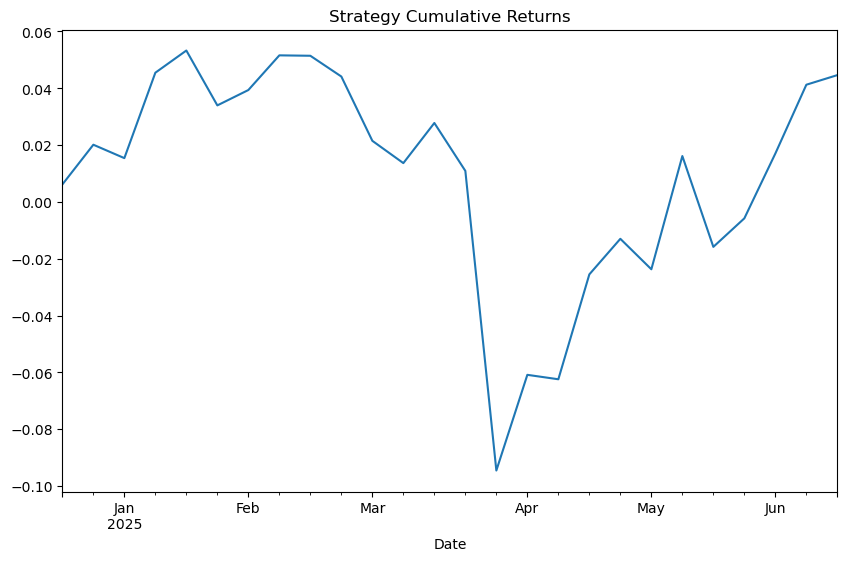

In [12]:

portfolio_returns.cumsum().plot(figsize=(10, 6), title="Strategy Cumulative Returns")


In [8]:
# Save portfolio returns to CSV for reuse
portfolio_returns.to_csv("portfolio_returns.csv")
